### Підключення бібліотек та ініціалізація необхідних змінних

In [128]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

images = []
images.append([cv.imread('images/list.jpg'), cv.imread('images/kust.jpg')])
images.append([cv.imread('images/2.jpg'), cv.imread('images/5.jpg')])
images.append([cv.imread('images/1.jpg'), cv.imread('images/5.jpg')])

count_matches = 5
titles = ['SIFT matchs', 'Keypoints SIFT', 'ORB matchs', 'Keypoints ORB']


sift = cv.SIFT_create()
sift_bf = cv.BFMatcher(cv.NORM_L2, crossCheck=True)

orb = cv.ORB_create()
bf_orb = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)

Алгоритм ORB вирішив використати для поріняння, бо він використовує новіший підхід

NORM — це тип нормалізації відстані між дескрипторами, який використовується для порівняння. cv.NORM_L2 обчислює евклідову відстань, а cv.NORM_HAMMING — кількість різних бітів між дескрипторами.

SIFT (cv.SIFT_create) — це алгоритм виявлення ключових точок і обчислення дескрипторів, орієнтований на пошук масштабонезалежних характеристик. ORB (cv.ORB_create) — це швидкий алгоритм, який поєднує BRIEF-дескриптори та FAST-детектори.

BFMatcher порівнює дескриптори на основі обраної нормалізації: L2 для SIFT, Hamming для ORB.

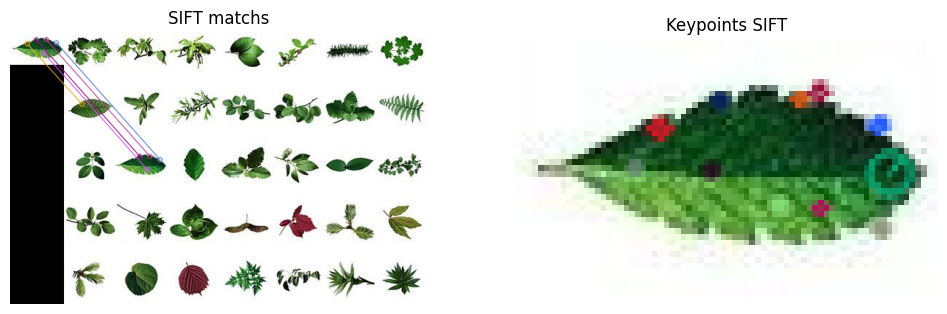

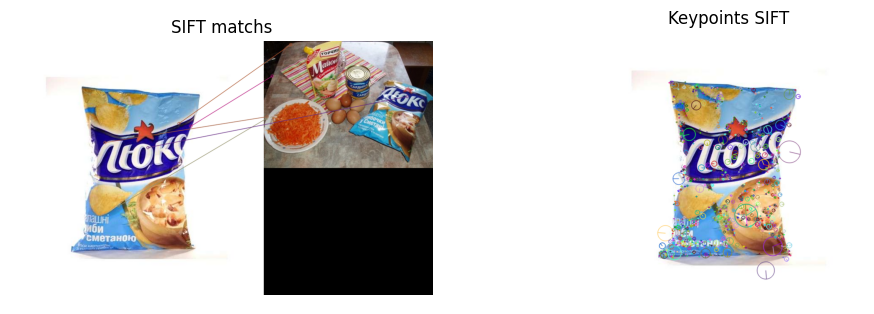

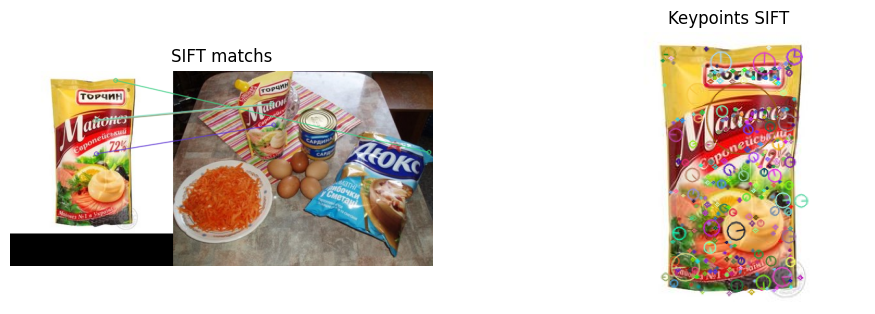

In [129]:
for i, img in enumerate(images):
    #  знаходимо ключові точки та обчислює дескриптори для двох зображень.
    keypoints_sift1, descriptors_sift1 = sift.detectAndCompute(img[0], None)
    keypoints_sift2, descriptors_sift2 = sift.detectAndCompute(img[1], None)
    
    # Порівнюємо дескриптори обох зображень і сортує їх за відстанню.
    img_matches = sorted(sift_bf.match(descriptors_sift1, descriptors_sift2), key=lambda x: x.distance)
    # Відображаємо лінії між співпадаючими ключовими точками двох зображень, обмежуючи кількість ліній змінною count_matches
    matched_img = cv.drawMatches(img[0], keypoints_sift1, img[1], keypoints_sift2, img_matches[:count_matches], None, flags=2)

    plt.figure(figsize=(12,12))
    plt.subplot(3, 2, 2*i+1)
    plt.imshow(cv.cvtColor(matched_img, cv.COLOR_BGR2RGB))
    plt.title(titles[0])
    plt.axis('off')

    img_with_keypoints_sift = cv.drawKeypoints(img[0], keypoints_sift1, None,flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    plt.subplot(3, 2, 2*i+2)
    plt.imshow(cv.cvtColor(img_with_keypoints_sift, cv.COLOR_BGR2RGB))
    plt.title(titles[1])
    plt.axis('off')


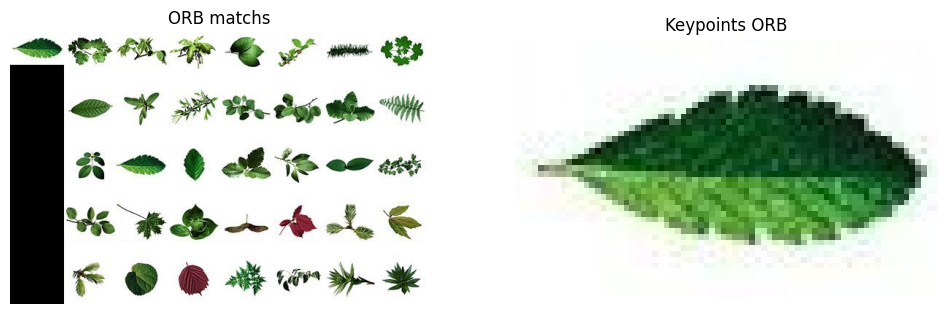

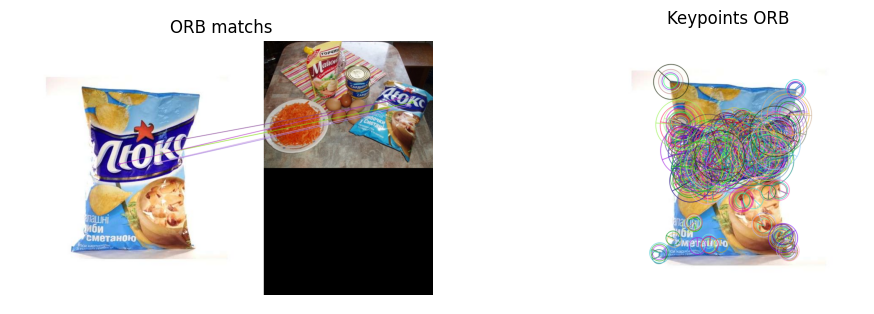

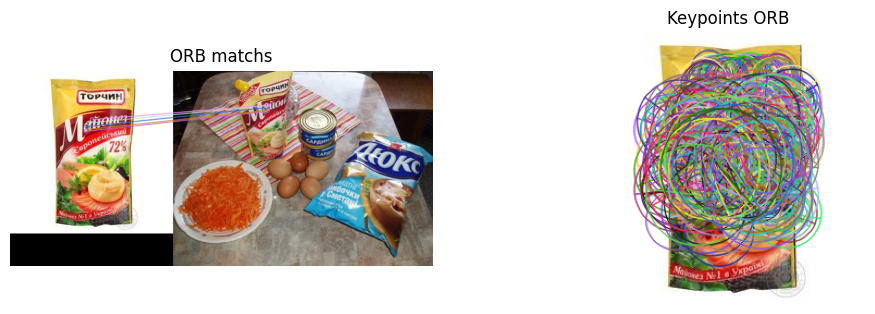

In [130]:
for img in images:
    #  знаходимо ключові точки та обчислює дескриптори для двох зображень.
    keypoints_orb1, descriptors_orb1 = orb.detectAndCompute(img[0], None)
    keypoints_orb2, descriptors_orb2 = orb.detectAndCompute(img[1], None)
    
    # Порівнюємо дескриптори обох зображень і сортує їх за відстанню.
    matches = sorted(bf_orb.match(descriptors_orb1, descriptors_orb2), key=lambda x: x.distance)
    # Відображаємо лінії між співпадаючими ключовими точками двох зображень, обмежуючи кількість ліній змінною count_matches
    matched_img = cv.drawMatches(img[0], keypoints_orb1, img[1], keypoints_orb2, matches[:count_matches], None, flags=2)
   
    plt.figure(figsize=(12,12))
    plt.subplot(3, 2, 2*i+1)
    plt.imshow(cv.cvtColor(matched_img, cv.COLOR_BGR2RGB))
    plt.title(titles[2])
    plt.axis('off')

    img_with_keypoints_orb = cv.drawKeypoints(img[0], keypoints_orb1, None,flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    plt.subplot(3, 2, 2*i+2)
    plt.imshow(cv.cvtColor(img_with_keypoints_orb, cv.COLOR_BGR2RGB))
    plt.title(titles[3])
    plt.axis('off')

Можна побачити що для зображень які мають мале розширення ключові точки не знаходяться методом ORB. Але як бачимо для 2-го та 3-го зображення ключові точки знаходяться набагато краще, особливо це видно в порінянні на зображенях з чипсами.